# Classification 종합실습

 ## 신용대출 심사

* 고객사는 ## 은행입니다. 신용평가 업무를 인공지능으로 전환하고자 여러분에게 모델링을 의뢰하였습니다.
* 대출업무는
    * 은행 창구에서 신청을 받고
    * 본사의 심사부서에서는 신용평가를 통해 대출 신청에 대한 승인 여부를 결정해 왔습니다.

* 현장의 요구
    * 경쟁사의 공격적인 대출상품 판매로, 본사에서는 자사 은행의 대출 실적이 줄어들고 있는 것에 부담을 느끼고 있습니다.
    * 그런데, 자사 은행에서는 신용평가 결과의 정확성에 의문을 품고 있으며, 신용평가 기준을 완화하여 가급적 대출승인 범위를 더 확대해 주기를 요구합니다. 

* 신용평가 업무를 인공지능으로 전환
    * 현장의 요구를 감안하여, 과거 사람이 하던 평가방식을 개선하고자 인공지능에 의한 예측 모델을 만들고, 정확도를 높이고자 합니다.
    * 최적의 모델을 생성해 봅시다.


## 1.환경준비

### (1) import

In [2]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


## 2.데이터 준비

### (1) 데이터 정리

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dummy_vars = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment','Occupation','ForeignWorker']
x = pd.get_dummies(x, columns = dummy_vars, drop_first = True)
x.head()

,Duration,CreditAmount,Age,Employment_2,Employment_3,Employment_4,Employment_5,CurrentAddress_2,CurrentAddress_3,CurrentAddress_4,...,SexMarital_4,MostValuableAsset_2,MostValuableAsset_3,MostValuableAsset_4,Apartment_2,Apartment_3,Occupation_2,Occupation_3,Occupation_4,ForeignWorker_2
0,24,1249,28,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,9,276,22,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,18,1049,21,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,24,6419,44,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,12,1424,55,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


### (5) 데이터분할2 : train : validation 나누기

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

In [7]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링

* 사용 알고리즘 : LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, SVC
* 3가지의 알고리즘을 선정하고 성능을 튜닝해 봅시다.

### (1) 로지스틱 회귀

* 함수 생성

In [8]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit(disp = False) # disp = False 실행로그 안보이게 하기!
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

* 전진선택법 수행

In [9]:
vars, result = forward_stepwise_logistic(x_train, y_train)

* 선택된 변수

In [10]:
print(x_train.shape[1], len(vars))
vars

41 16


['AccountBalance_3',
 'Payment_3',
 'Purpose_1',
 'CreditAmount',
 'Payment_2',
 'Duration',
 'Employment_2',
 'AccountBalance_2',
 'ForeignWorker_2',
 'Purpose_3',
 'SexMarital_3',
 'CreditCount_2',
 'CurrentAddress_2',
 'MostValuableAsset_4',
 'Telephone_2',
 'Occupation_4']

* 전체 변수로 모델링

In [11]:
m1 = LogisticRegression()
m1.fit(x_train, y_train)
p1 = m1.predict(x_val)

print(accuracy_score(y_val, p1))
print(classification_report(y_val, p1))

0.7266666666666667
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        97
           1       0.77      0.85      0.81       203

    accuracy                           0.73       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.71      0.73      0.72       300



* 전진선택법 변수로 모델링

In [12]:
m2 = LogisticRegression()
m2.fit(x_train[vars], y_train)
p2 = m2.predict(x_val[vars])

print(accuracy_score(y_val, p2))
print(classification_report(y_val, p2))

0.7333333333333333
              precision    recall  f1-score   support

           0       0.62      0.46      0.53        97
           1       0.77      0.86      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.72      0.73      0.72       300



### (2) 의사결정나무

In [13]:
# dictionary형태로 선언
params = { 'max_depth' : range(2,11), 'min_samples_leaf':range(10,101,10)}
params

{'max_depth': range(2, 11), 'min_samples_leaf': range(10, 101, 10)}

In [14]:
# 기본모델
m = DecisionTreeClassifier()

# Random Search 설정.
m3 = GridSearchCV(m, params, cv = 5)

In [15]:
# 학습 
m3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(10, 101, 10)})

In [16]:
# 최적의 파라미터
m3.best_params_

{'max_depth': 3, 'min_samples_leaf': 80}

In [ ]:
m3.cv_results_

In [ ]:
m3.cv_results_['mean_test_score']

In [19]:
m3.best_score_

0.7428571428571429

In [20]:
# best 모델로 예측 및 평가
p3 = m3.predict(x_val)
print(classification_report(y_val, p3))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        97
           1       0.76      0.82      0.79       203

    accuracy                           0.70       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.69      0.70      0.70       300



* 튜닝 모델은 시각화, 변수 중요도 확인은 어떻게 하나요?

In [47]:
# 최적의 모델은 아래와 같은 이름을 갖게 됩니다.
m3.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=80)

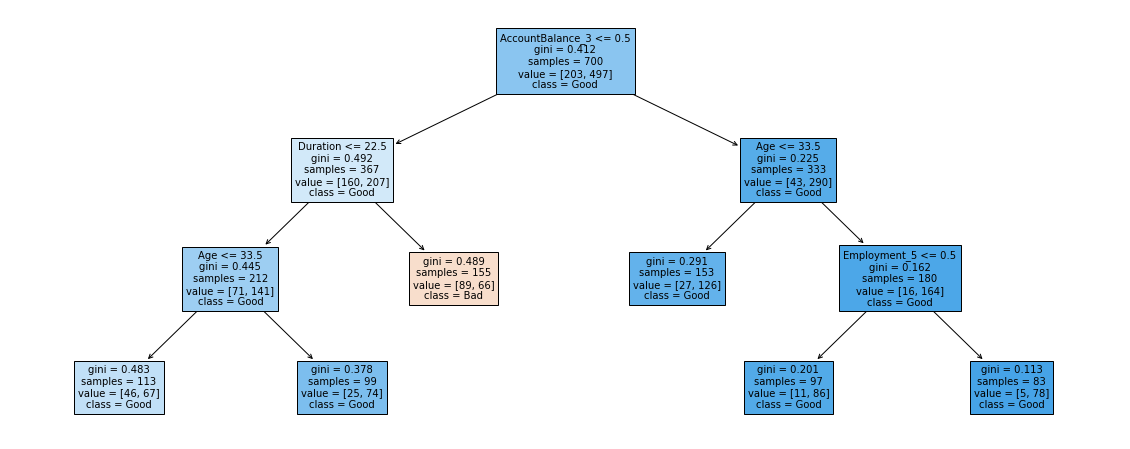

In [49]:
# 이 이름을 이용하여 시각화
plt.figure(figsize = (20,8)) # 그림 사이즈 조절
plot_tree(m3.best_estimator_, feature_names = x_train.columns, 
               class_names= ['Bad', 'Good'], filled = True, fontsize = 10);

In [50]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

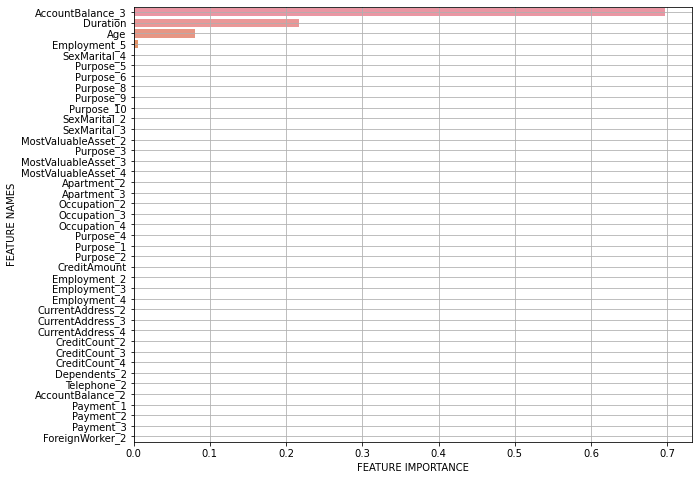

In [51]:
# 이 이름을 이용하여 변수중요도 뽑기
result = plot_feature_importance(m3.best_estimator_.feature_importances_, list(x_train))

### (3) KNN

In [36]:
# dictionary형태로 선언
params = { 'n_neighbors' : range(1,51,2), 'metric' : ['euclidean', 'manhattan']  }
params

{'n_neighbors': range(1, 51, 2), 'metric': ['euclidean', 'manhattan']}

In [37]:
# 기본모델
m = KNeighborsClassifier()

# Random Search 설정.
m4 = GridSearchCV(m, params, cv=5)

In [38]:
# 학습 : model이 아니라 model_rs
m4.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 51, 2)})

In [39]:
# 최적의 파라미터
m4.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [40]:
# best 모델로 예측 및 평가
p4 = m4.predict(x_val_s)
print(classification_report(y_val, p4))

              precision    recall  f1-score   support

           0       0.49      0.29      0.36        97
           1       0.72      0.86      0.78       203

    accuracy                           0.67       300
   macro avg       0.60      0.57      0.57       300
weighted avg       0.64      0.67      0.65       300



### (4) SVM

In [41]:
params = { 'C' : np.linspace(0.1, 5, 10), 'gamma' : np.linspace(0.1, 5, 10) }
params

{'C': array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
        2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ]),
 'gamma': array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
        2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ])}

In [42]:
# 기본모델
m = SVC()

# Random Search 설정.
m5 = GridSearchCV(m, params, cv=5)

In [43]:
# 학습 : model이 아니라 model_rs
m5.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ]),
                         'gamma': array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ])})

In [44]:
# 최적의 파라미터
m5.best_params_

{'C': 2.277777777777778, 'gamma': 0.1}

In [45]:
# best 모델로 예측 및 평가
p5 = m5.predict(x_val_s)
print(classification_report(y_val, p5))

              precision    recall  f1-score   support

           0       0.56      0.46      0.51        97
           1       0.76      0.83      0.79       203

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.71      0.70       300



### (5) 성능비교

In [46]:
acc, rec_1, rec_0, prec_1, prec_0 = [],[],[],[],[]
model = ['lr', 'dt','knn','svm']
pred = [p2, p3, p4, p5]

for i, p in enumerate(pred) :
    acc.append(accuracy_score(y_val, p))
    rec_1.append(recall_score(y_val, p, pos_label = 1))
    prec_1.append(precision_score(y_val, p, pos_label = 1))
    rec_0.append(recall_score(y_val, p, pos_label = 0))
    prec_0.append(precision_score(y_val, p, pos_label = 0))

result = pd.DataFrame({'model':model,'acc':acc,'rec_1':rec_1,'prec_1':prec_1
                      , 'rec_0':rec_0,'prec_0':prec_0})
result

,model,acc,rec_1,prec_1,rec_0,prec_0
0,lr,0.733333,0.862069,0.770925,0.463918,0.616438
1,dt,0.703333,0.817734,0.761468,0.463918,0.548780
2,knn,0.673333,0.857143,0.716049,0.288660,0.491228
3,svm,0.710000,0.827586,0.763636,0.463918,0.562500
